## Predictive Systems

In this notebook you will be working with a base class for a Continuous Distribution probability function to approximate different distributions studied through the first unit of Predictvie Systems. Continuous functions use the integral of the density function to approximate the probabilities for a given interval:
$$ P(a \leq X \leq b) = \int_{a}^{b} f(x) dx$$

The following code offers a vectorized integral approximation using the composite trapezoidal approximation:

In [1]:
import numpy as np

def approximateIntegral(f, a, b, steps = 50):
    step_size = (b-a)/steps
    x = np.linspace(a, b, steps)
    y = f(x)
    return np.sum(y*step_size)

As an example let's approximate the integral of $f(x) = 2x$ for the interval $(0, 10)$

In [2]:
fx = lambda x: 2*x
print(approximateIntegral(fx, 0, 10))

100.00000000000001


The quality of the approximation can be improved using more steps so we generate a higher resolution grid:

In [3]:
print(approximateIntegral(fx, 0, 10, 100))

100.0


When you work with more complex functions you may need to add more steps to your grid in order to get better approximmations for the integral of the density function with the drawback to require greater computational times. As an example let's compute the integral for $f(x) = \int_0^{10} 3x^2$:

In [4]:
fx = lambda x: 3* (x **2)
print(approximateIntegral(fx, 0, 10))

1010.2040816326531


In [5]:
print(approximateIntegral(fx, 0, 10, 1000000))

1000.0005000005


You can plot the function to see the shape of the density function using the code below:

In [6]:
import matplotlib.pyplot as plt

def plotFunction(x, y):
    plt.plot(x,y, color='r')
    plt.fill_between(x,y)
    plt.xlim([x[0],x[-1]])
    plt.ylim([0, max(y) + 1])
    plt.show()

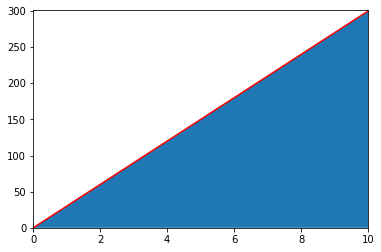

In [8]:
a, b = 0, 10
steps = 2
x = np.linspace(a, b, steps)
y = fx(x)
plotFunction(x, y)

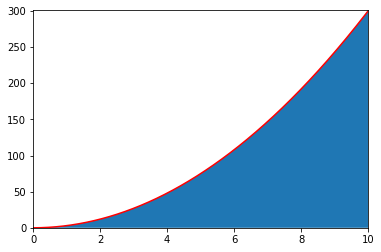

In [9]:
steps = 10000
x = np.linspace(a, b, steps)
y = fx(x)
plotFunction(x, y)

**Exercise**: Make a class to compute the definite integral of a function recieving as paramters the function to integrate $f(x)$, the interval to calculate the integral $(a, b)$, the number of steps and a boolean flag to plot the function as indicated. You can see an example of the output below:

In [41]:
def integrate(f, a, b, steps = 50, plot=False):
    #Your code here
    return

50 steps integral approximmation:  1010.2040816326531


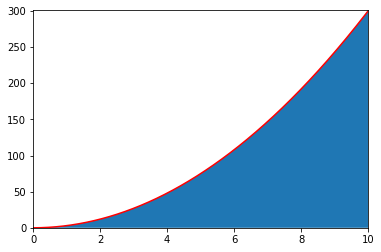

100000 steps integral approximmation:  1000.0500050005


In [39]:
print("50 steps integral approximmation: ", integrate(fx,a, b))
print("100000 steps integral approximmation: ", integrate(fx,a, b, 10000, True))

## Continuous distributuion class
Use the provided integral approximmaiton function to build your own classes of continuous probability distributions. A base class si provided for you to have an idea of the required methods:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class ContinuousDistribution:
    
    def __init__(self, **parameters):
        print(parameters)
        for k, v in parameters.items():
            setattr(self, k, v)
        #initialize the paramters of the distribution
    
    def densityFunction(self, a, b):
        #Calculate the density function and return it as a vectorizable function
        density = None
        return density
    
    def vectorizedDensity(self):
        return np.vectorize(self.densityFunction)
    
    def integrate(self, f, a, b, steps = 50, plot=False):
        #Here you must implement your integration method as described above
        integral = None
        return integral
    
    def plotFunction(self, x, y):
        #Plot x and y
        return
    
    def probability(self, a, b):
        #Here you should approximate the integral of the density function in the 
        #interval a, b, using the steps you need (depending on the complexity of the density function)
        probability = None
        return probability
    
    def expectedValue(self):
        #Here you will calculate the expected value of the probability function and return it
        expected_value = None
        return expected_value
    
    def variance(self):
        #Here you will calculate the expected value of the probability function and return it
        variance = None
        return variance

In [29]:
c = ContinuousDistribution(p1 = 1, p2=2, p3=3, p4=4)
print(c.p1, c.p2, c.p3, c.p4)
a = c.integrate(lambda x: x, a, b)
print(a)

{'p1': 1, 'p2': 2, 'p3': 3, 'p4': 4}
1 2 3 4
None


## Example use of the class:

In [3]:
class UniformDistribution(ContinuousDistribution):
    
    def densityFunction(self, a, b):
        return 1/(self.theta2 - self.theta1)
    
    def expectedValue(self):
        return (self.theta2 - self.theta1)/2
    
    def variance(self):
        return (self.theta2 - self.theta1)**2/12

## Uniform Distribution example
Arrivals of customers at a checkout counter follow a Uniform
distribution. It is known that, during a given 30 minute period, one
customer arrived at the counter. Find the probability that the
customer arrived during the last 5 minutes of the 30 minute period.

This follows a uniform distribution with paramters $\theta_1 = 0$ and $\theta_2 = 30$, we want to meassure the probability of $(25 \leq Y \leq 30)$ Therefore:

In [5]:
uniform = UniformDistribution(theta1 = 0, theta2=30)
print(uniform.probability(25, 30))
print(uniform.expectedValue())
print(uniform.variance())

{'theta1': 0, 'theta2': 30}
None
15.0
75.0


## Assignment
* Implement the DiscreteDistribution, ContinuousDistribution classes
* Extend the classes to create the following distributions:
    * Binomial
    * Geometric
    * Hypergeometric
    * Poisson
    * Uniform 
    * Normal
    * Gamma
    * Exponential
    * Beta
* Create a couple of specific classes to calculate mutivariate distributions
    * Multinomial
    * Dirichlet
* Implement the code to calculate the probabilities of at least one example of the distribution probabilities (You can use either the example on the slides or another example)
* Explain your code and give a report of the precission of each distribution (How reilable it is)